In [4]:
import sys
sys.path.append('/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/nEXO_CRYO_ASIC/')

import numpy as np  
import matplotlib.pyplot as plt

from scripts.CryoAsicAnalysis import CryoAsicAnalysis
from scripts.CryoAsicEventViewer import CryoAsicEventViewer

# Charge-readout board system data analysis

In this notebook, data from the bench test of charge-readout board system in Stanford is analysed.

## Batch loading of external pulsers data
- Looking into the waveform dataset of external pulsers;

In [2]:
# Coupled and uncoupled channels are defined here.
coupled_channels = []
for i in range(4):
    coupled_channels.append(i*8)
    coupled_channels.append(i*8+1)
    coupled_channels.append(i*8+2)
    coupled_channels.append(i*8+3)
for i in range(4):
    coupled_channels.append(32+i*8+4)
    coupled_channels.append(32+i*8+5)
    coupled_channels.append(32+i*8+6)
    coupled_channels.append(32+i*8+7)

    
uncoupled_channels = []
for i in range(64):
    if i not in coupled_channels:
        uncoupled_channels.append(i)

In [13]:
from scripts.CryoAsicAnalysis import CryoAsicAnalysis
from scripts.CryoAsicEventViewer import CryoAsicEventViewer

from scripts.batch_processing import batch
cmp = batch()


shapes = [ 'squarewave', ] # 'square' OR 'sine'
freqs = [50, 100, 150]
amps = [20,]

for freq in freqs:
    print(f"Frequency = {freq} kHz with period {1/freq*1e3:.3f} us.")
    for shape in shapes:
        for amp in amps:
            #infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/halfspeed-20240229/halfspeed-932-12pt-3g-{shape}-pulse-{freq}kHz-{amp}mV.h5'
            infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-{shape}-{freq}kHz-{amp}mV.h5'
            label = f'FE932-{shape}-{freq}kHz-{amp}mV'
            
            configs = {'sampling_rate' : 2, 'dead_channels' : [], 'mv_per_adc':0.39, 'key_channel': -1, "baseline": [0, 10], }
            tmp_ana = CryoAsicAnalysis(infile, config=configs)
            tmp_view = CryoAsicEventViewer(infile, config=configs)
            
            cmp._add_analyser(label, tmp_ana)
            cmp._add_viewer(label,   tmp_view)

            
#infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/halfspeed-20240229/halfspeed-932-12pt-3g-decoupled.h5'
infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-noise.h5'
#label = f'FE932-decoupled'
label = f'FE932-noise'
configs = {'sampling_rate' : 2, 'dead_channels' : [], 'mv_per_adc':0.39, 'key_channel': -1, "baseline": [0, 10], }
tmp_ana = CryoAsicAnalysis(infile, config=configs)
tmp_view = CryoAsicEventViewer(infile, config=configs)
            
cmp._add_analyser(label, tmp_ana)
cmp._add_viewer(label,   tmp_view)
            
cmp.subtract_baseline()
cmp.calculate_noise();

Frequency = 50 kHz with period 20.000 us.
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-squarewave-50kHz-20mV.h5
Done loading
Frequency = 100 kHz with period 10.000 us.
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-squarewave-100kHz-20mV.h5
Done loading
Frequency = 150 kHz with period 6.667 us.
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-squarewave-150kHz-20mV.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-noise.h5
Done loading


  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/246 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

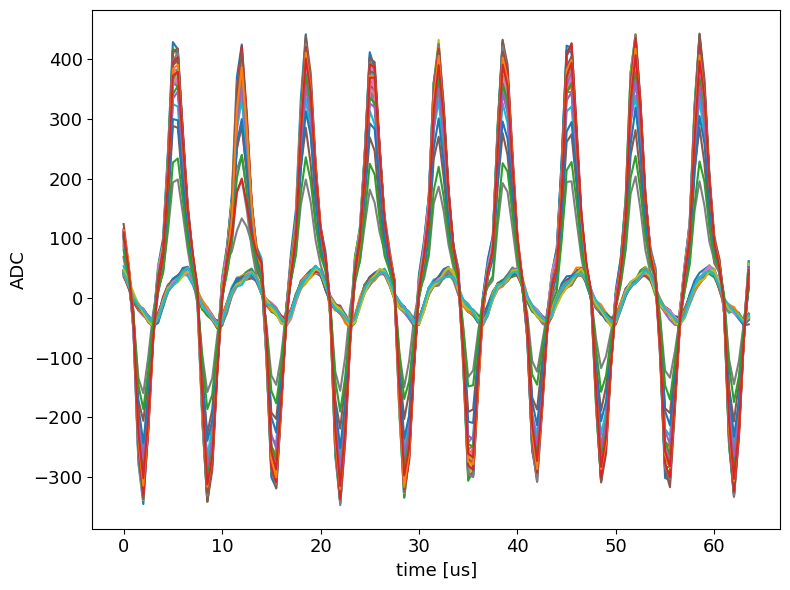

In [19]:
evtid, chid = 23, 10

fig = cmp._plot_waveforms_oneEvent(['FE932-squarewave-150kHz-20mV'], range(64), 99, lg=False);
#cmp._plot_waveforms_oneEvent(['FE932-noise'], [0, 2, 4, 6], 55);

[ 4  5  6  7 12 13 14 15 20 21 22 23 28 29 30 31 32 33 34 35 40 41 42 43
 48 49 50 51 56 57 58 59]


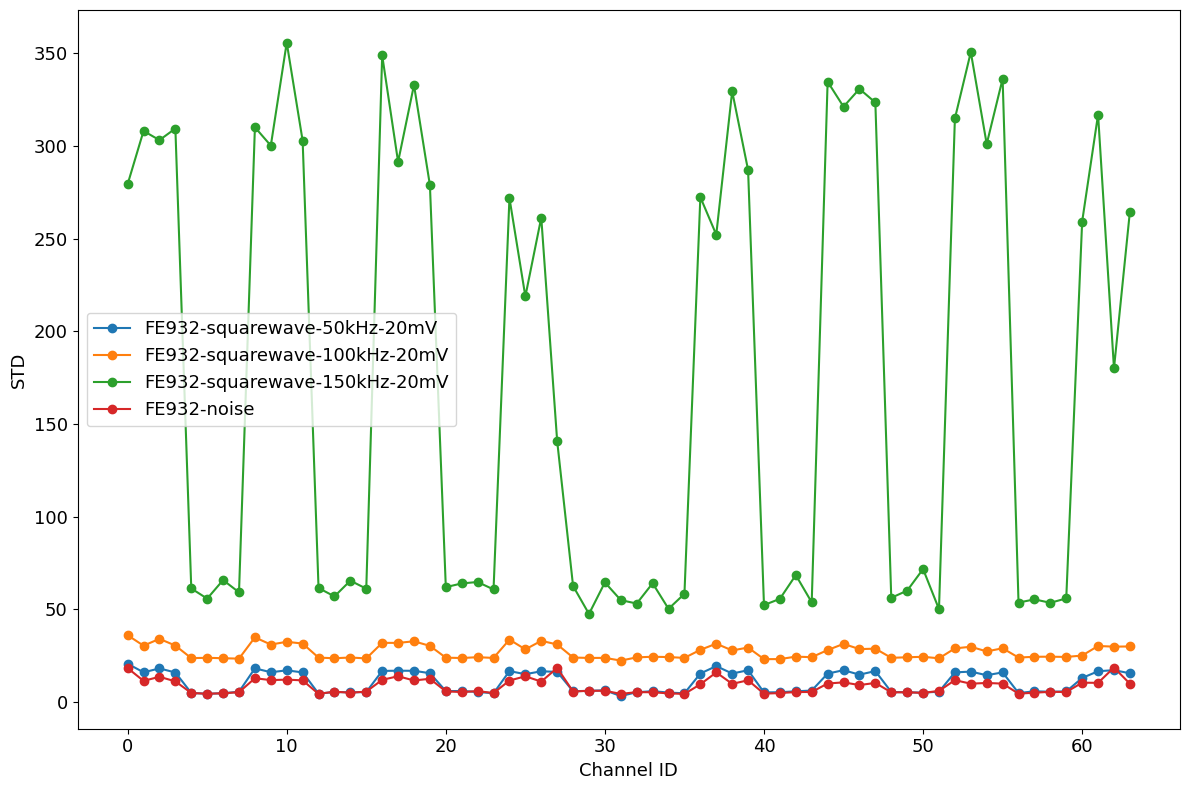

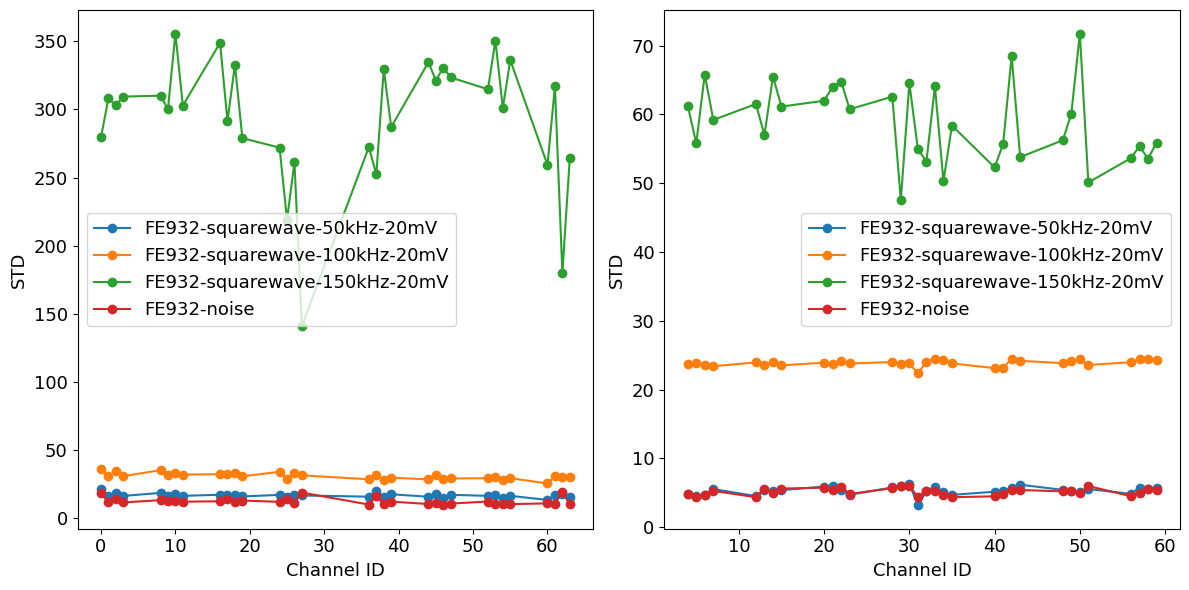

In [4]:



cmp._set_coupled_channel(channels)
cmp._plot_std([]);
cmp._plot_std_separately([]);

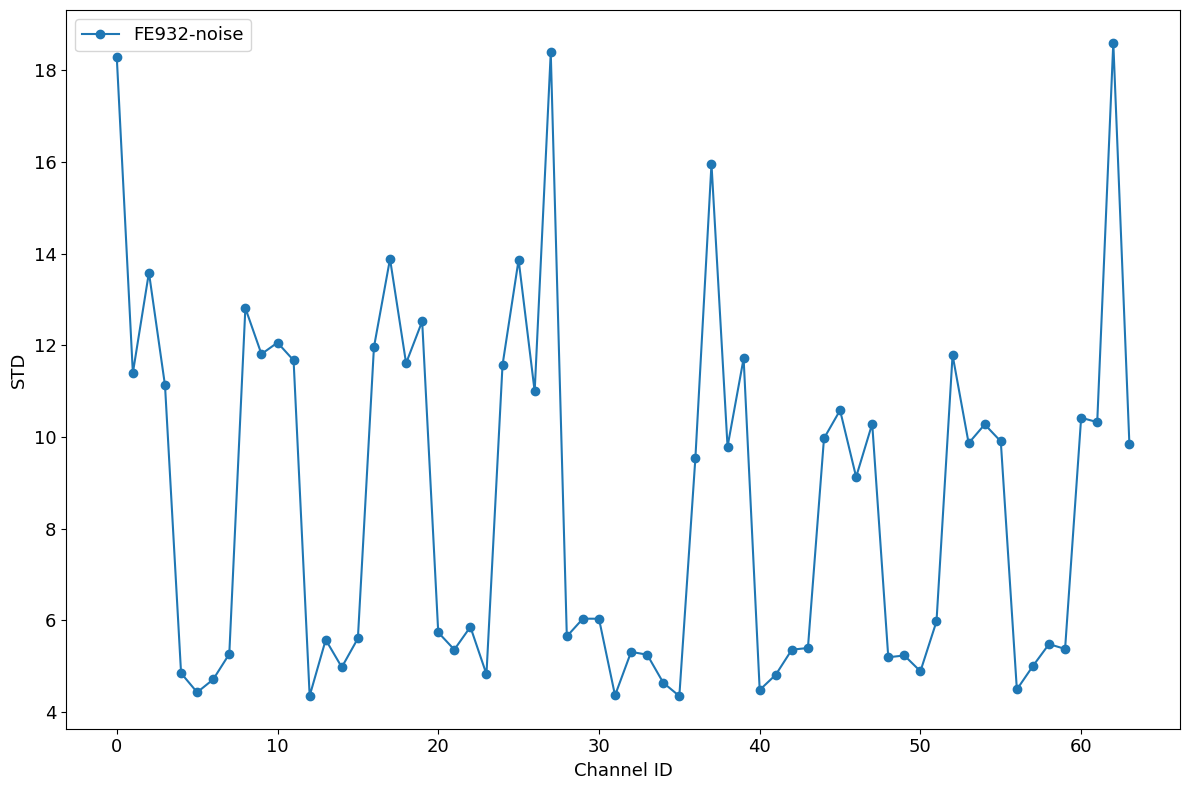

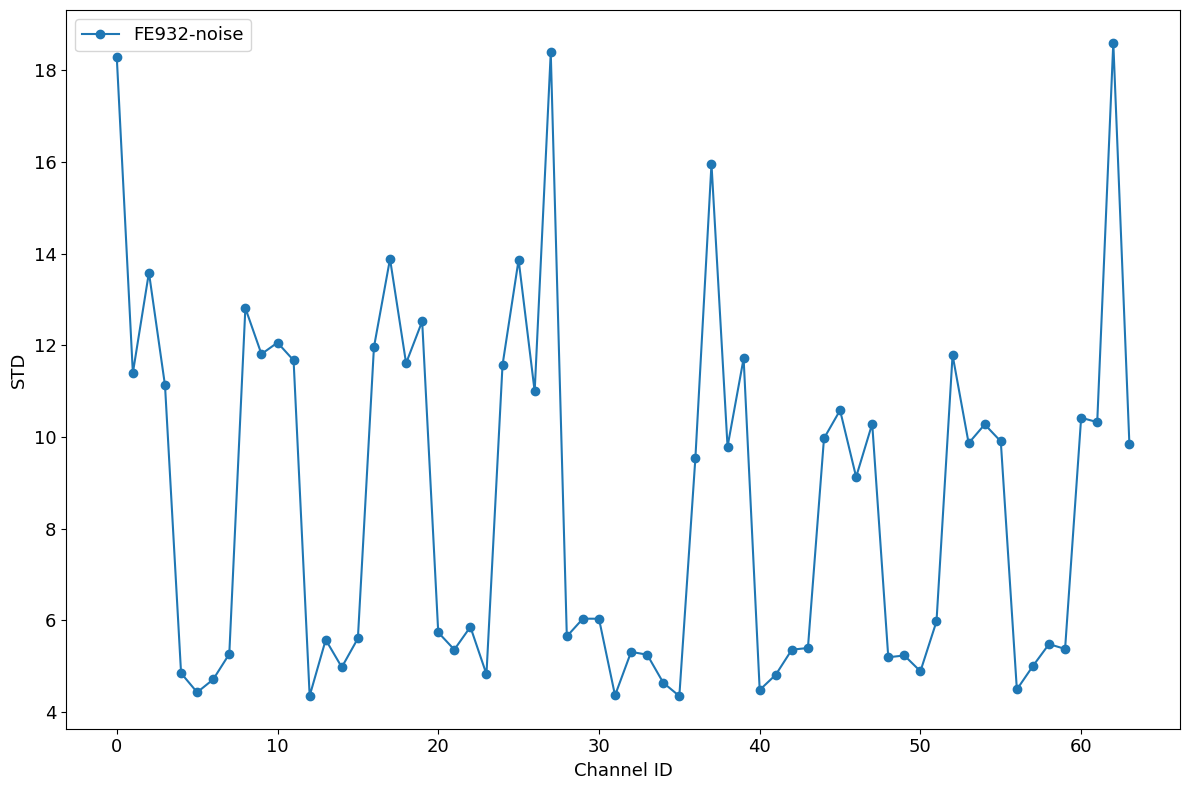

In [5]:
cmp._plot_std(['FE932-noise']);

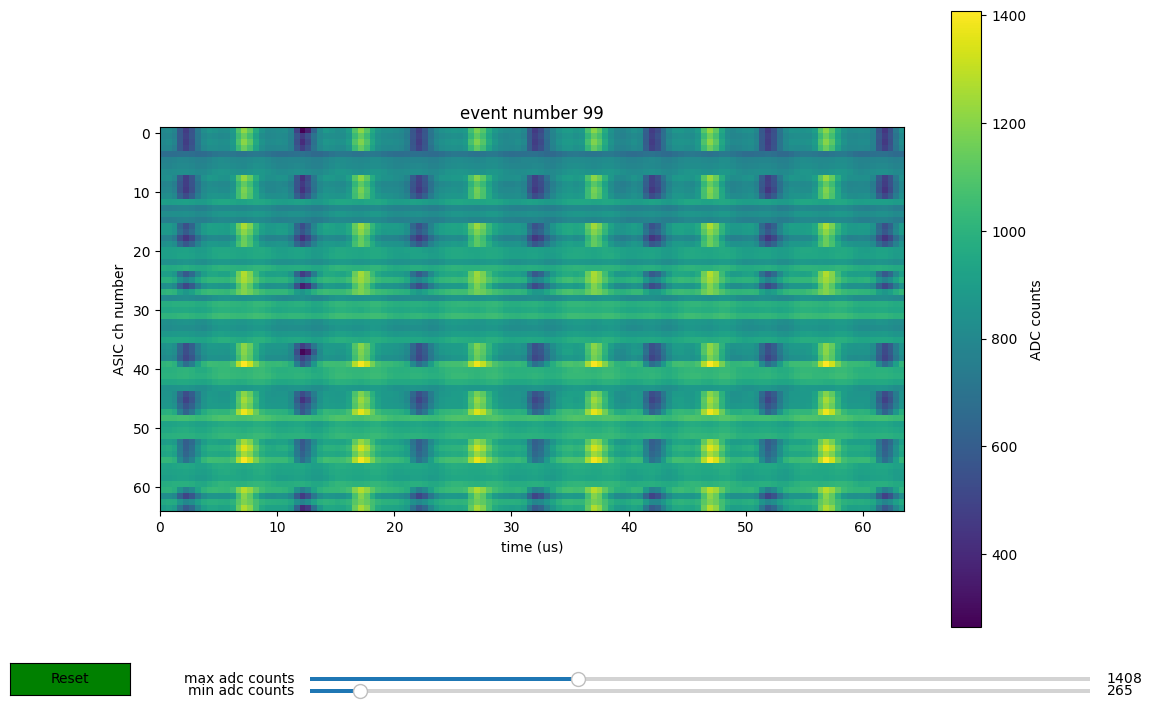

In [8]:
view = cmp.viewers['FE932-squarewave-100kHz-20mV']
view.plot_event_rawcryo(99)

## Noise analysis 

Analysing the noise in the CRB (STD and PSD) for both channels coupled with mock tile and the uncoupled ones.

Coupled channel Id [0, 1, 2, 3, 8, 9, 10, 11, 16, 17, 18, 19, 24, 25, 26, 27, 36, 37, 38, 39, 44, 45, 46, 47, 52, 53, 54, 55, 60, 61, 62, 63]

The uncoupled channels have the Cdet = $$... (unknown now).

In [6]:
from scripts.CryoAsicAnalysis import CryoAsicAnalysis
from scripts.CryoAsicEventViewer import CryoAsicEventViewer

from scripts.batch_processing import batch
cmp = batch()

path = '/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11/'

filelist = [path + 'fullspeed-928-06pt-3g-long-noise.h5', path + 'fullspeed-932-12pt-3g-long-noise.h5', path + 'fullspeed-936-24pt-3g-long-noise.h5', path + 'fullspeed-940-36pt-3g-long-noise.h5' ]

labellist = ['0.6 us + 3.0X', '1.2 us + 3.0X', '2.4 us + 3.0X', '3.6 us + 3.0X']

configs = {'sampling_rate' : 2, 'dead_channels' : [], 'mv_per_adc':0.39, 'key_channel': -1, "baseline": [0, 100], }

for lb, infile in zip(labellist, filelist):

    tmp_ana = CryoAsicAnalysis(infile, config=configs)
    tmp_view = CryoAsicEventViewer(infile, config=configs)
            
    cmp._add_analyser(lb, tmp_ana)
    cmp._add_viewer(lb,   tmp_view)

cmp.subtract_baseline()
cmp.calculate_noise(calcpsd=True);

loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11/fullspeed-928-06pt-3g-long-noise.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11/fullspeed-932-12pt-3g-long-noise.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11/fullspeed-936-24pt-3g-long-noise.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11/fullspeed-940-36pt-3g-long-noise.h5
Done loading


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

Calculating avg PSD on channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating avg PSD on channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating avg PSD on channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating avg PSD on channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

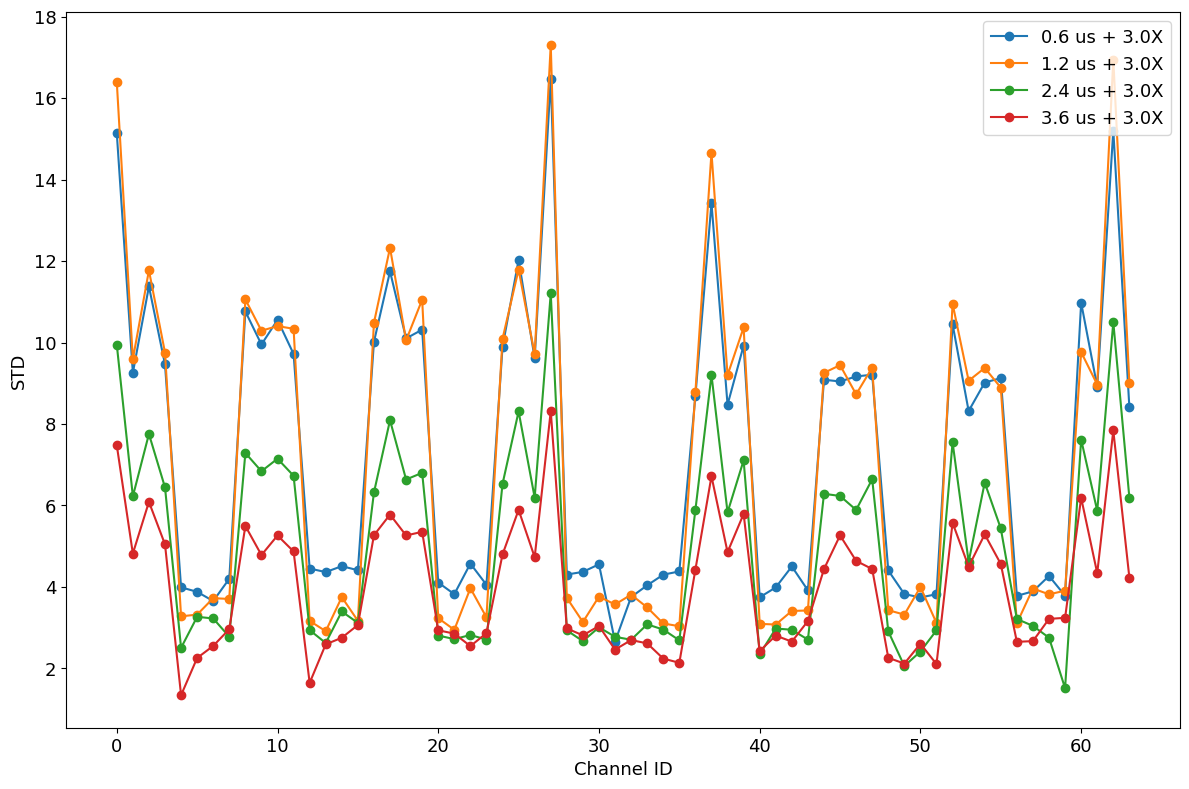

In [7]:
cmp._plot_std([]);

[]

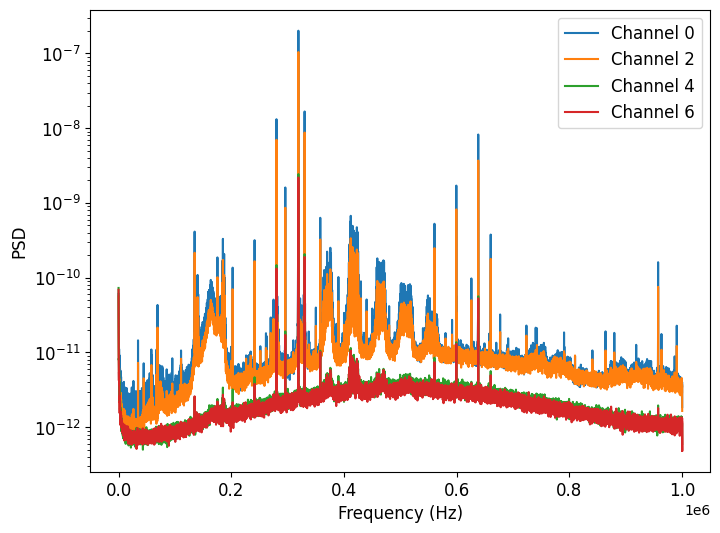

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(cmp.noise_dfs['0.6 us + 3.0X']['Freqs'].iloc[0], cmp.noise_dfs['0.6 us + 3.0X']['PSD'].iloc[0], label='Channel 0')
ax.plot(cmp.noise_dfs['0.6 us + 3.0X']['Freqs'].iloc[2], cmp.noise_dfs['0.6 us + 3.0X']['PSD'].iloc[2], label='Channel 2')
ax.plot(cmp.noise_dfs['0.6 us + 3.0X']['Freqs'].iloc[4], cmp.noise_dfs['0.6 us + 3.0X']['PSD'].iloc[4], label='Channel 4')
ax.plot(cmp.noise_dfs['0.6 us + 3.0X']['Freqs'].iloc[6], cmp.noise_dfs['0.6 us + 3.0X']['PSD'].iloc[6], label='Channel 6')
ax.set_xlabel('Frequency (Hz)', fontsize=12)
ax.set_ylabel('PSD', fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
ax.semilogy()

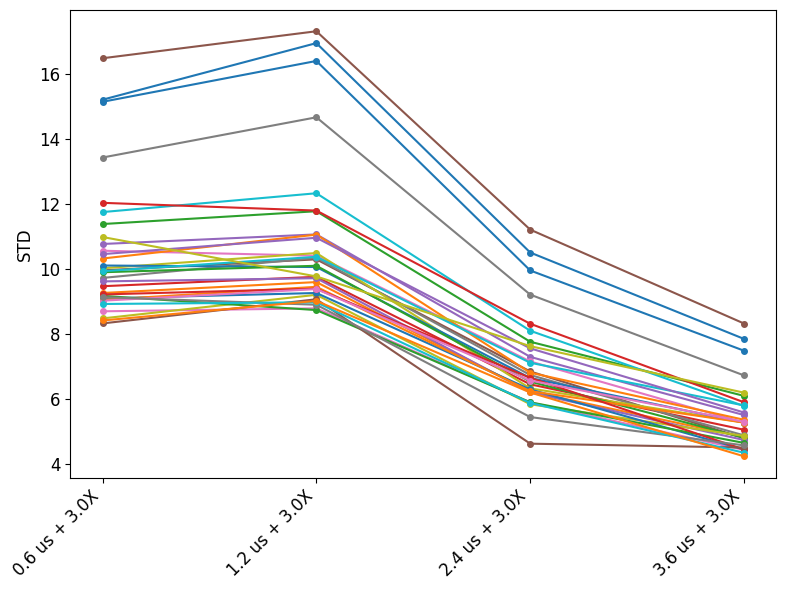

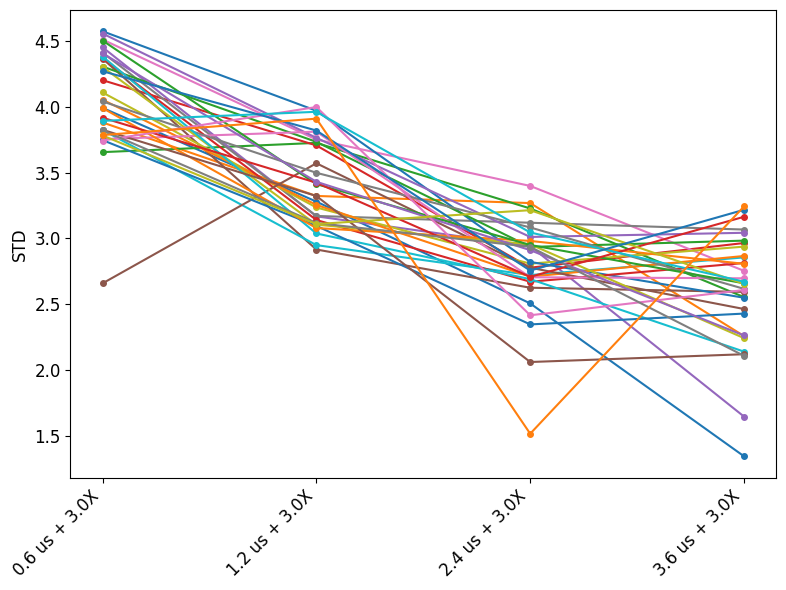

In [9]:
cmp._plot_std_differentSets([], coupled_channels, );
cmp._plot_std_differentSets([], uncoupled_channels, );

## Point charge test analysis


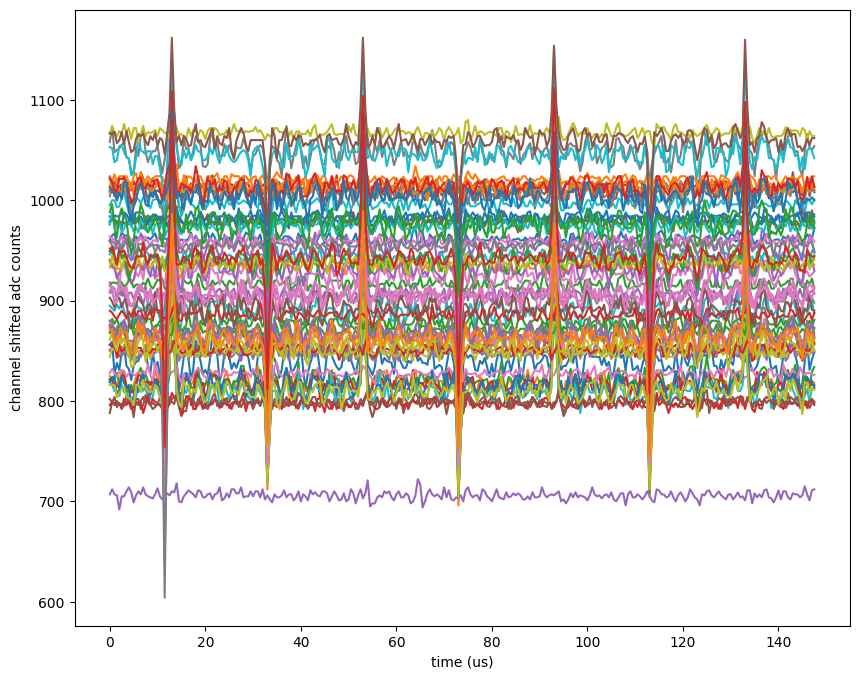

loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-1V-25kHz-source5.h5
Done loading


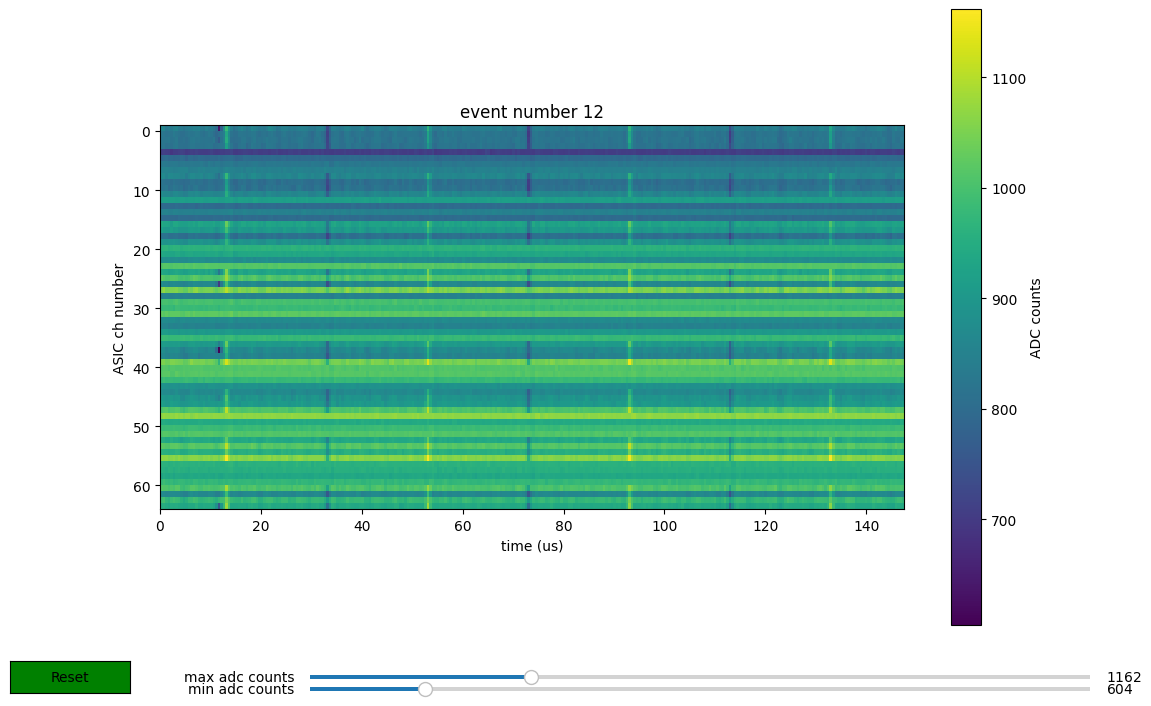

In [21]:
from scripts.CryoAsicAnalysis import CryoAsicAnalysis
analyser = CryoAsicAnalysis('/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-1V-25kHz-source5.h5', config=configs)
analyser.plot_waves(12)

from scripts.CryoAsicEventViewer import CryoAsicEventViewer
viewer = CryoAsicEventViewer('/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-1V-25kHz-source5.h5', config=configs)
viewer.plot_event_rawcryo(12)

In [5]:
from scripts.batch_processing import batch

bch = batch()

configs = {'sampling_rate' : 2, 'dead_channels' : [], 'mv_per_adc':0.39, 'key_channel': -1, "baseline": [0, 100], }
path = '/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/'
inputlist = [path+'fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source1.h5', path+'fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source2.h5', path+'fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source4.h5', path+'fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source5.h5', path+'fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source6.h5']
labels = ['1V+source1', '1V+source2', '1V+source4', '1V+source5', '1V+source6']

for infile, lb in zip(inputlist, labels):
    tmp_ana = CryoAsicAnalysis(infile, config=configs)
    tmp_view = CryoAsicEventViewer(infile, config=configs)
            
    bch._add_analyser(lb, tmp_ana)
    bch._add_viewer(lb,   tmp_view)

bch.subtract_baseline()
bch.calculate_noise(calcpsd=False);




loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source1.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source2.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source4.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source5.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-11-point-test/fullspeed-928-06pt-3g-point-test-square-3V-25kHz-source6.h5
Done loa

  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

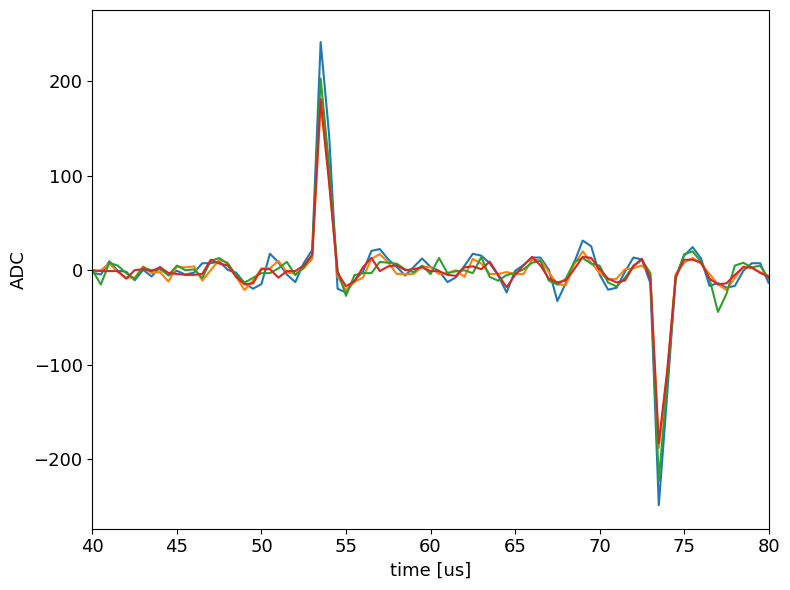

In [9]:
evtid, chid = 23, 10

fig = bch._plot_waveforms_oneEvent(['1V+source1'], [0, 1, 2, 3], 9, lg=False, xrange=[40, 80]);
#cmp._plot_waveforms_oneEvent(['FE932-noise'], [0, 2, 4, 6], 55);